In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import re
import os
import networkx as nx
import numpy as np
import pandas as pd
from utils.show_results import extract_w, extract_and_compare_max_means, extract_numbers, print_graph

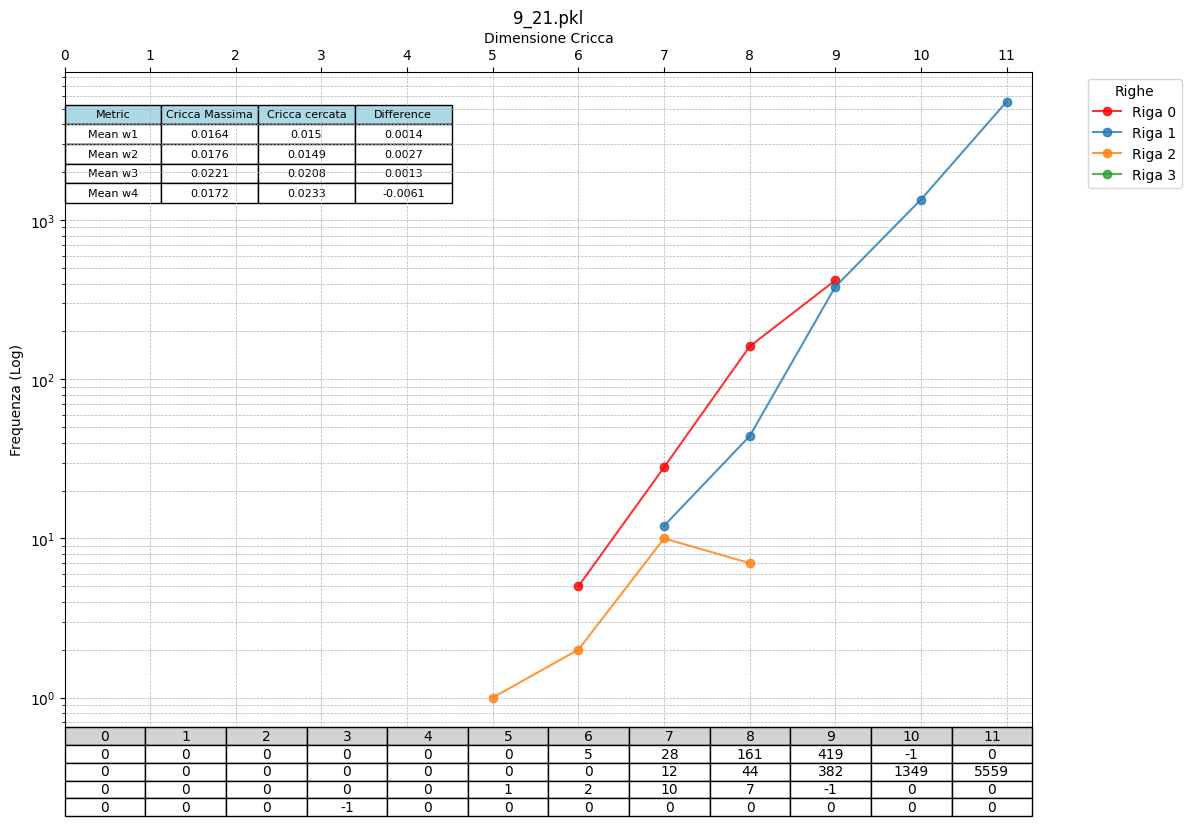

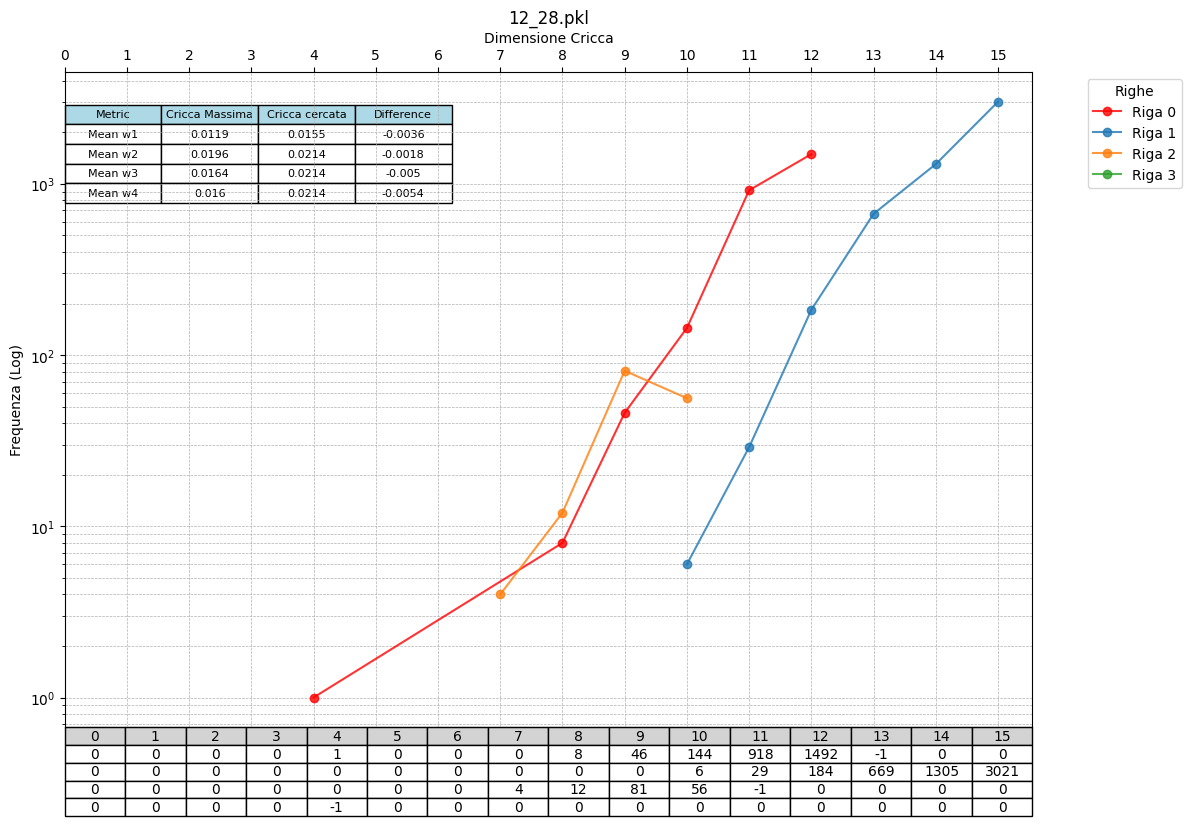

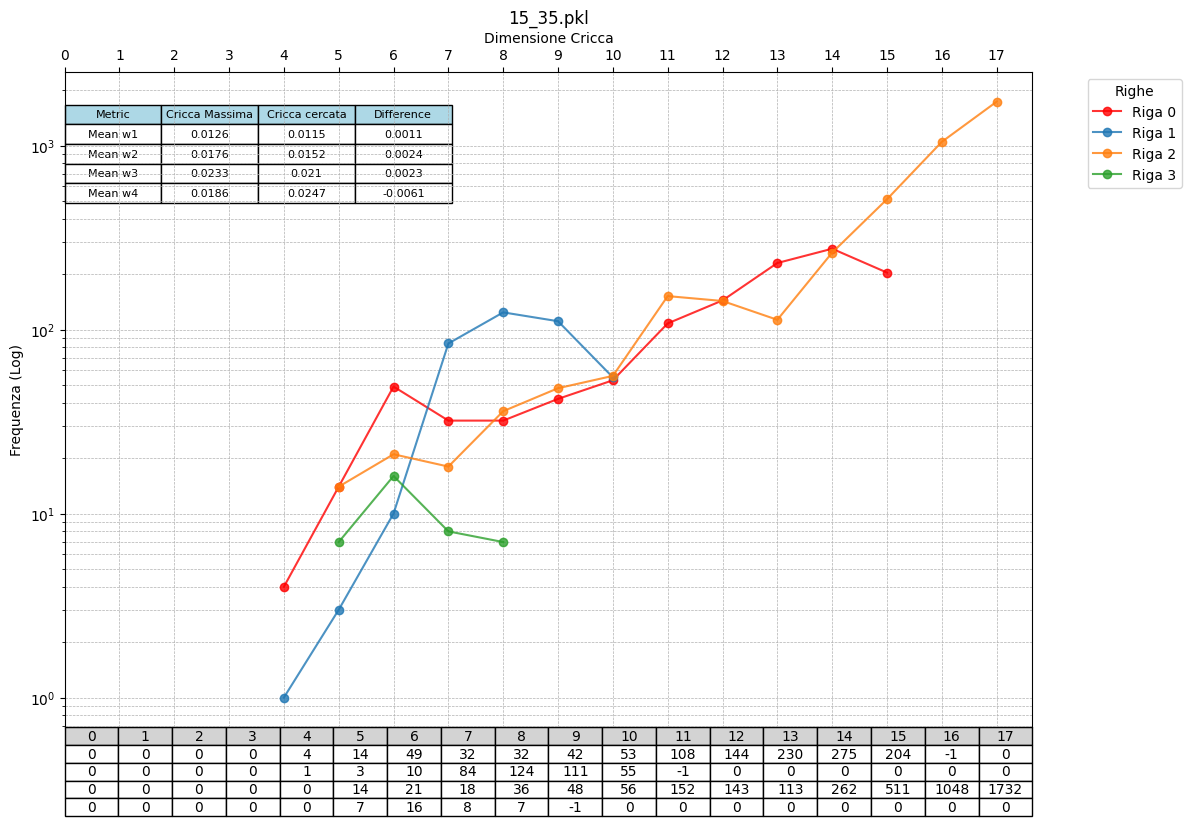

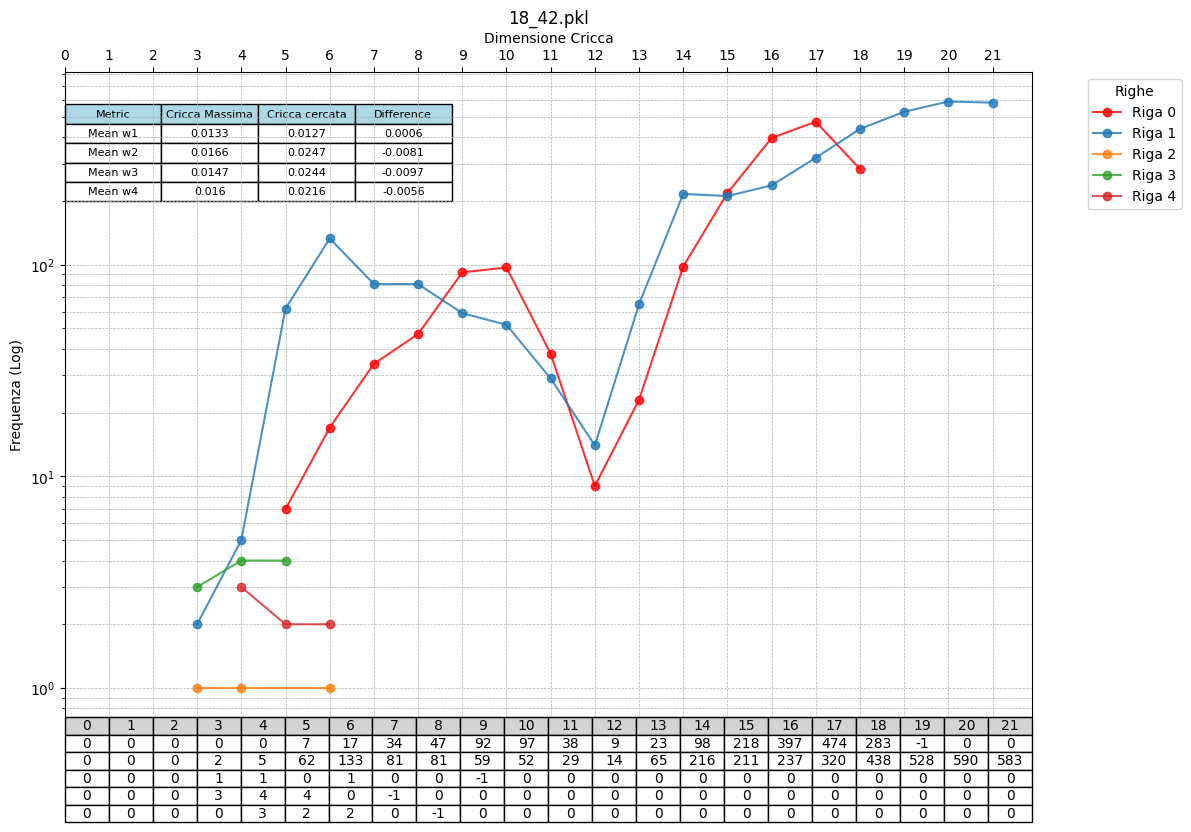

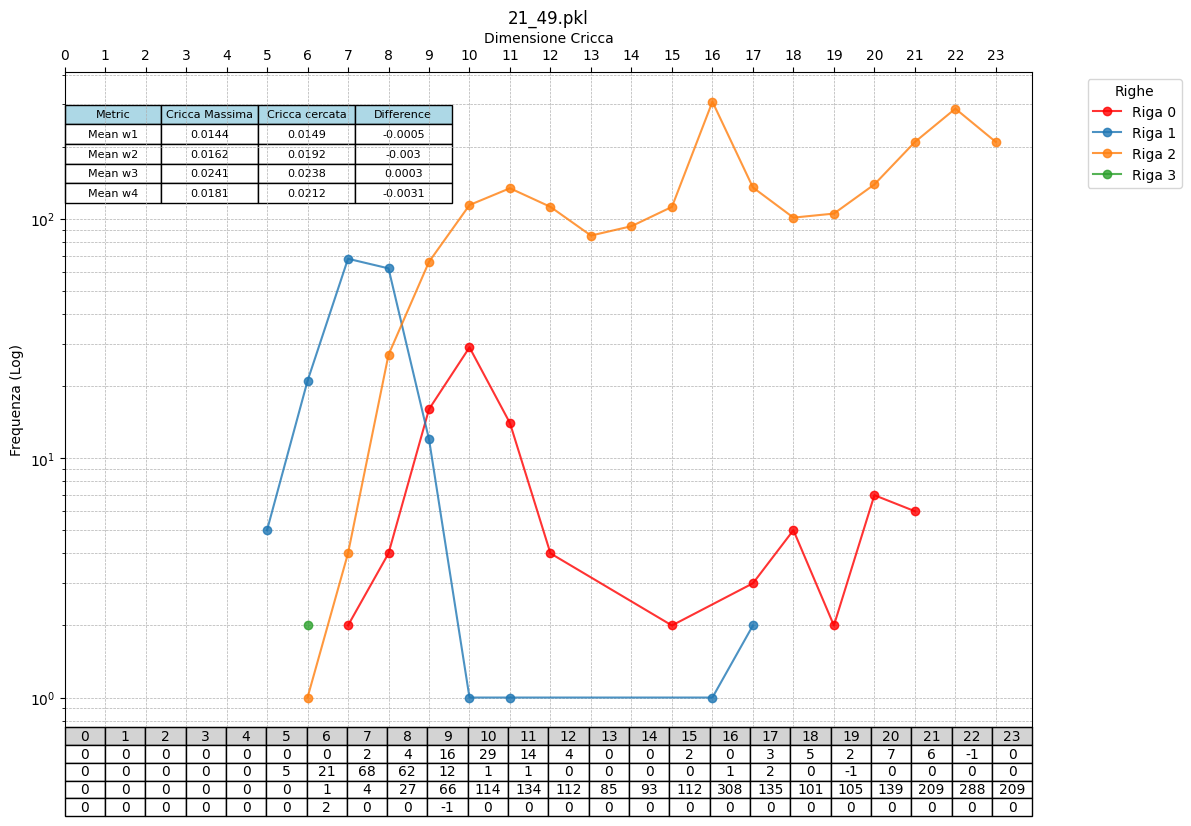

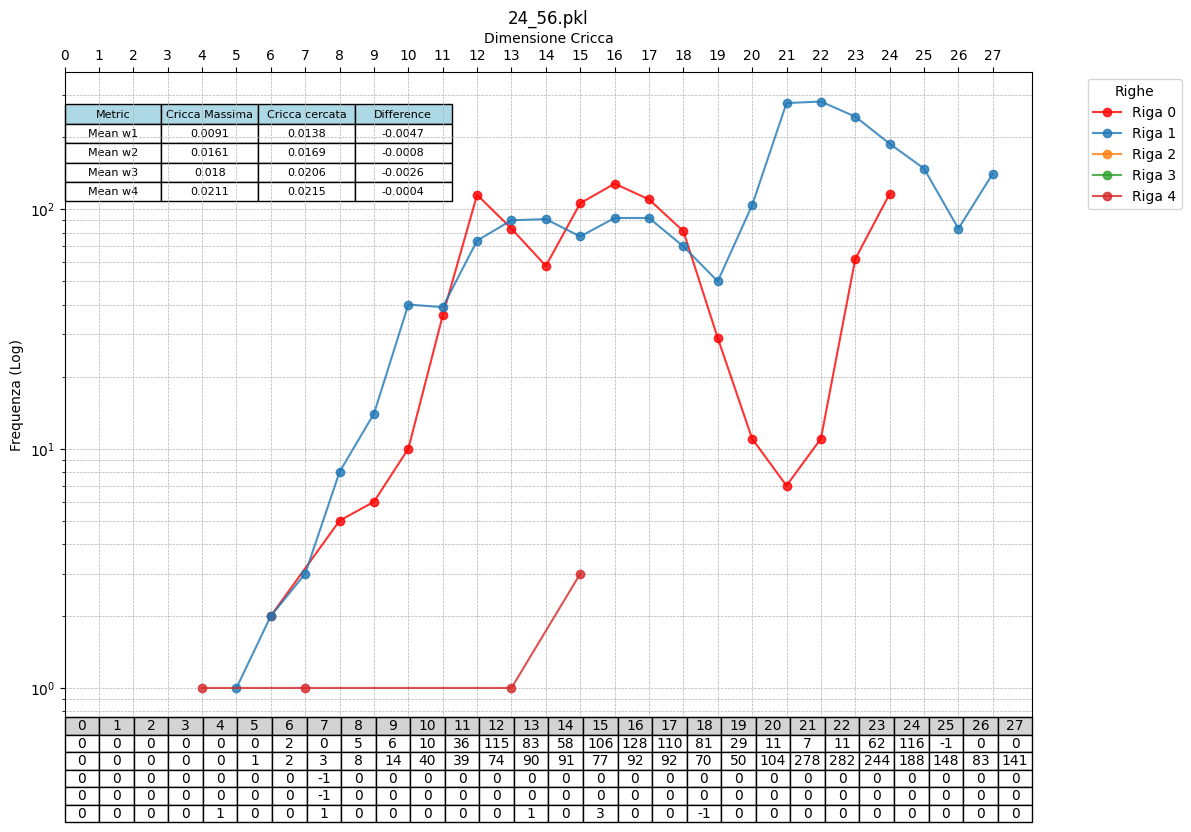

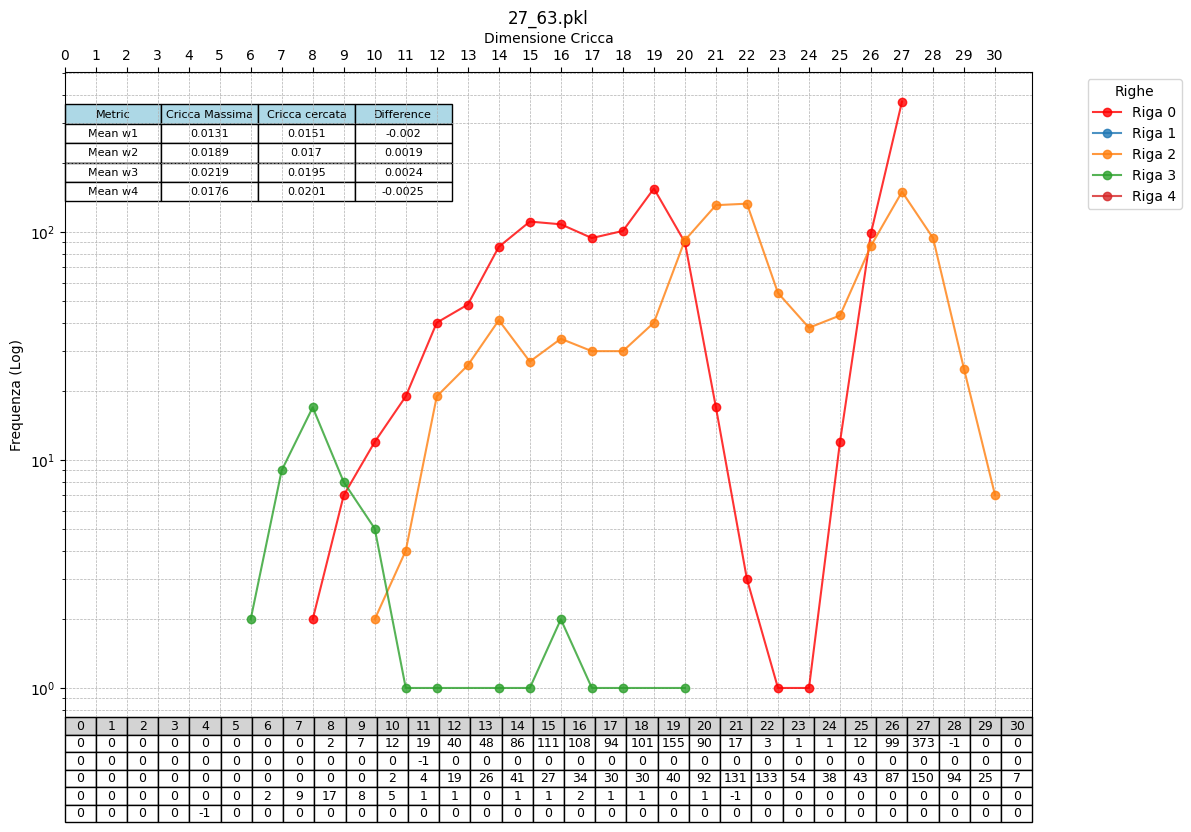

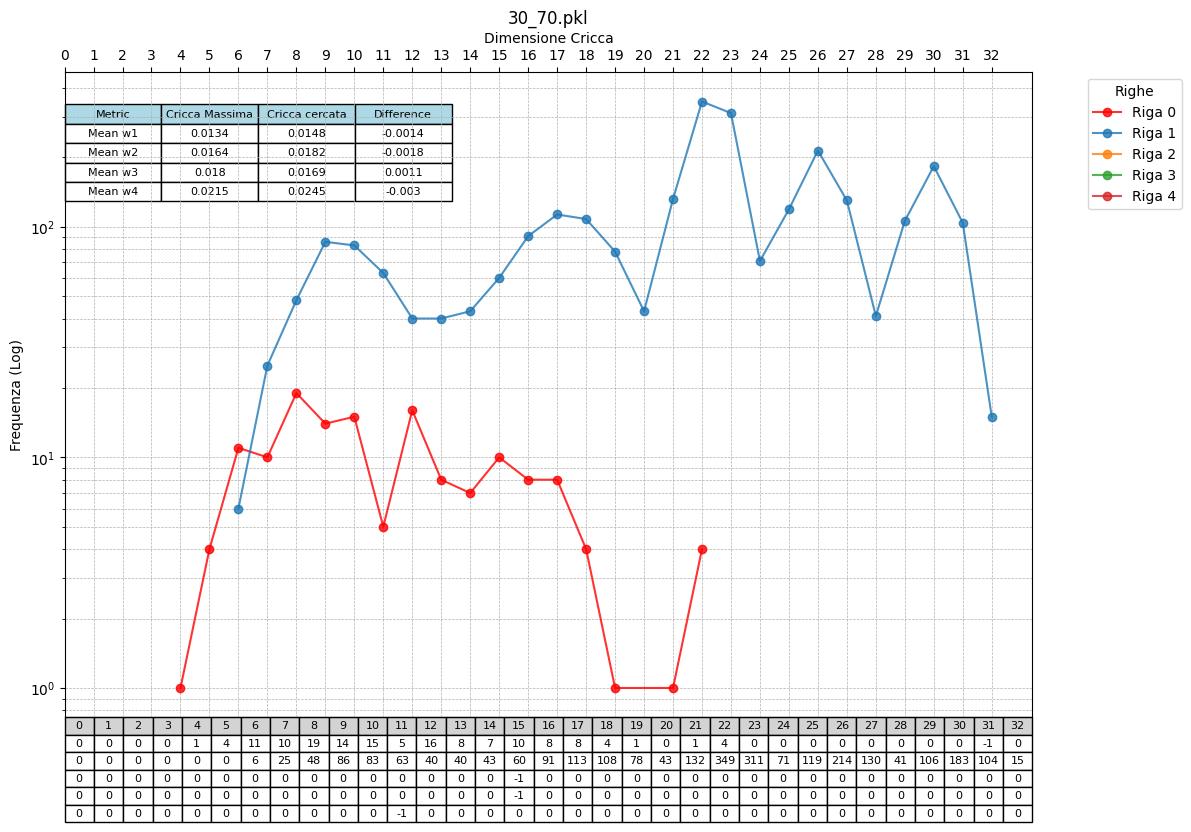

In [ ]:
folder = "./output/static_ratio_more_batch"
for i in sorted(os.listdir(f"{folder}/full_dataframes"), key=extract_numbers):
    df_f = f"{folder}/full_dataframes/" +i
    graph = f"{folder}/graphs/" + i
    function = f"{folder}/cli_func/" + i
    with open(graph, "rb") as f:
        G = pickle.load(f)
    with open(function, "rb") as f:
        cli_func = pickle.load(f)
    df_w = extract_w(G, cli_func)
    df_diff = extract_and_compare_max_means(df_w)
    with open(df_f, "rb") as f:
        df = pickle.load(f)
    print_graph(df,df_diff, i, 0, folder)

# Confronto DF

In [6]:
def plot_first_row_graph(df1, df2, file_name, lab1, lab2):
    # Estrai la prima riga da entrambi i DataFrame
    row1 = df1.iloc[0]
    row2 = df2.iloc[0]
    
    # Filtra i valori fino al primo -1
    row1_filtered = row1[:row1[row1 == -1].index[0]]
    row2_filtered = row2[:row2[row2 == -1].index[0]]
    
    # Crea il grafico
    plt.figure(figsize=(10, 6))
    plt.plot(row1_filtered.index, row1_filtered.values, 'r-', label=lab1)
    plt.plot(row2_filtered.index, row2_filtered.values, 'b-', label=lab2)
    
    # Aggiungi dettagli al grafico
    plt.xlabel('Indice')
    plt.ylabel('Valore')
    plt.title(f'Confronto tra valori con e senza QUBO {file_name}')
    plt.legend()
    plt.grid(True)
    name_cut = re.sub(r'[<>:"/\\|?*]', '_', file_name.replace(".pkl", ""))
    #output_path = f"./output/static_ratio_40/figures_comparison/{name_cut}.png"
    #plt.savefig(output_path, dpi=300, bbox_inches='tight') 
    plt.show()

In [7]:
def sum_points(arr):
    sum = 0
    max = len(arr)
    for idx, val in enumerate(arr):
        if idx+1 <= int(20*max/100):
            sum += val*1
        elif idx+1 > int(20*max/100) or idx+1 <= int(40*max/100):
            sum += val*2
        elif idx+1 > int(40*max/100) or idx+1 <= int(60*max/100):
            sum += val*3
        elif idx+1 > int(60*max/100) or idx+1 <= int(80*max/100):
            sum += val*4
        else:
            sum += val*5
    return sum

def give_points(df1):
    row = df1.iloc[0]
    row_filtered = row[:row[row == -1].index[0]]
    pr= sum_points(row_filtered)
    return pr

In [8]:
folder = "./output/static_ratio/full_dataframes"
points = pd.DataFrame(columns=["Name", "Points Normal", "Points more batch"])
for i in sorted(os.listdir(folder), key=extract_numbers):
    df1_f = "./output/static_ratio/full_dataframes/" +i
    df2_f = "./output/static_ratio_more_batch/full_dataframes/" +i
    with open(df1_f, "rb") as f:
        df1 = pickle.load(f)
    with open(df2_f, "rb") as f:
        df2 = pickle.load(f)
    points1 = give_points(df1)
    points2 = give_points(df2)
    points.loc[len(points)] = [i, points1, points2]
points

,Name,Points Normal,Points more batch
0,9_21.pkl,806,1226
1,12_28.pkl,1470,5218
2,15_35.pkl,1966,2374
3,18_42.pkl,1984,3668
4,21_49.pkl,1870,188
5,24_56.pkl,1034,1952
6,27_63.pkl,3746,2758
7,30_70.pkl,2684,287
8,33_77.pkl,332,469
9,36_84.pkl,1980,1808


In [9]:
max_value = max(points["Points Normal"].max(), points["Points more batch"].max())
points["Points Normal"] = points["Points Normal"] / max_value
points["Points more batch"] = points["Points more batch"] / max_value
points

,Name,Points Normal,Points more batch
0,9_21.pkl,0.154465,0.234956
1,12_28.pkl,0.281717,1.000000
2,15_35.pkl,0.376773,0.454964
3,18_42.pkl,0.380222,0.702951
4,21_49.pkl,0.358375,0.036029
5,24_56.pkl,0.198160,0.374090
6,27_63.pkl,0.717900,0.528555
7,30_70.pkl,0.514373,0.055002
8,33_77.pkl,0.063626,0.089881
9,36_84.pkl,0.379456,0.346493


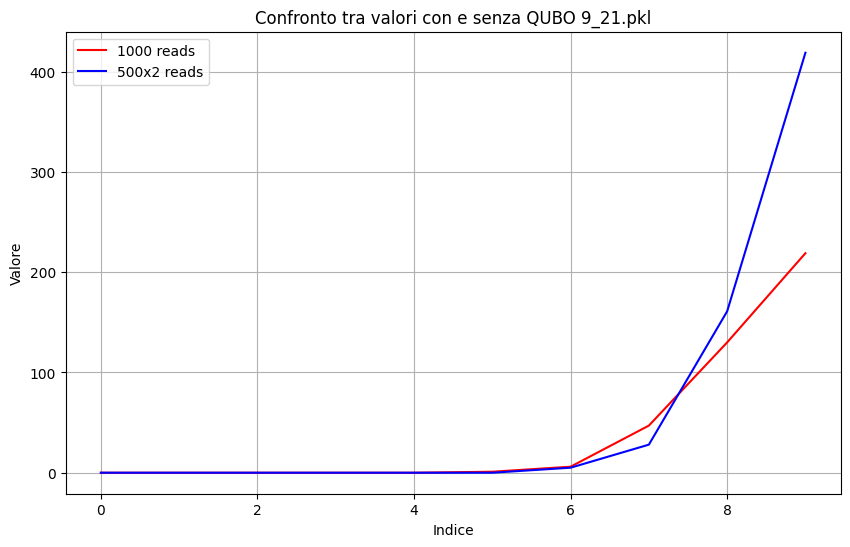

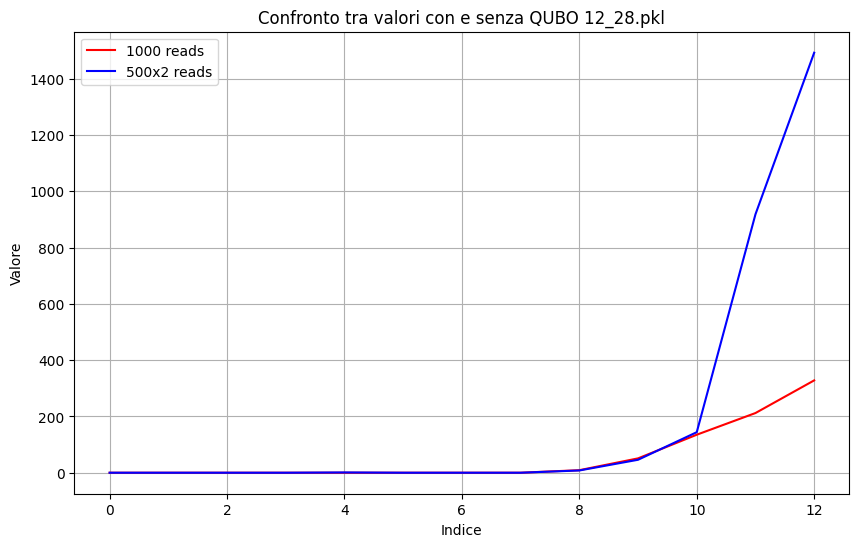

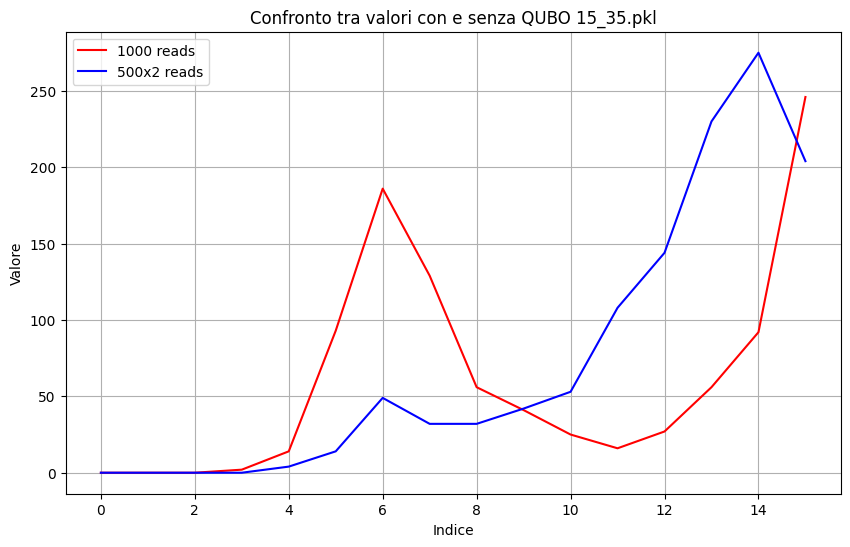

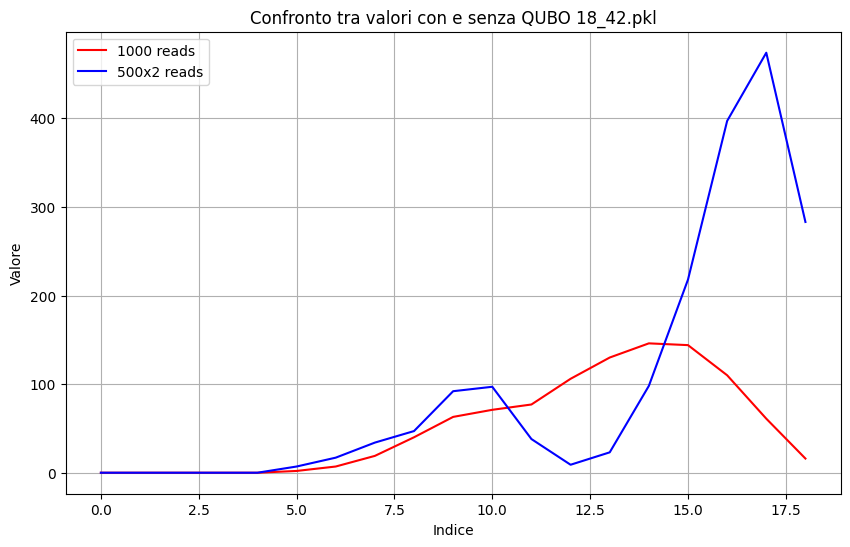

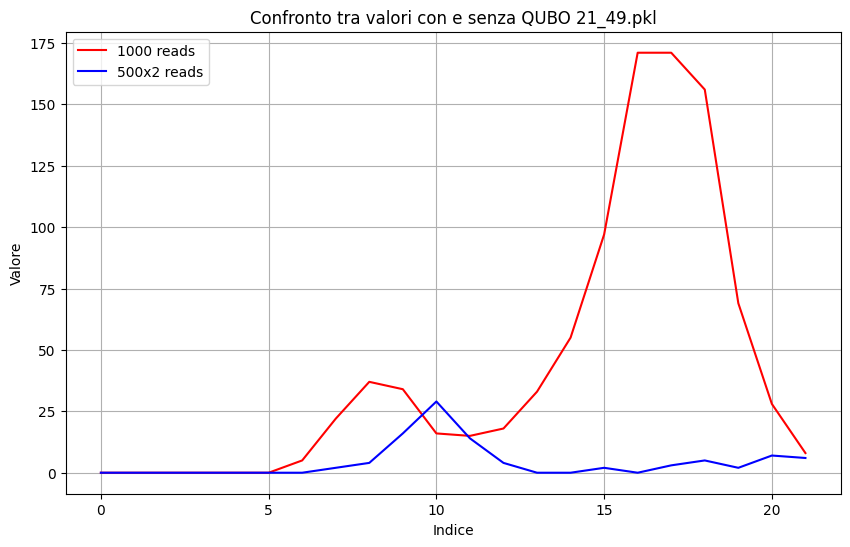

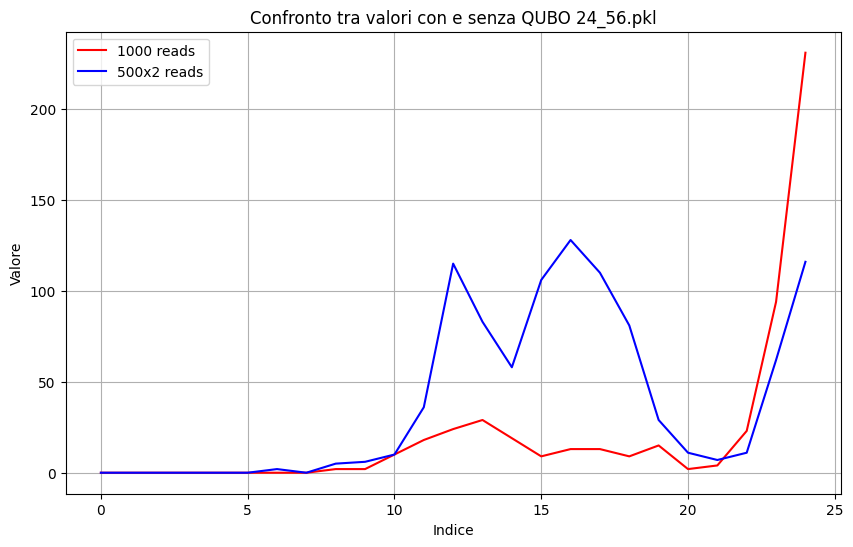

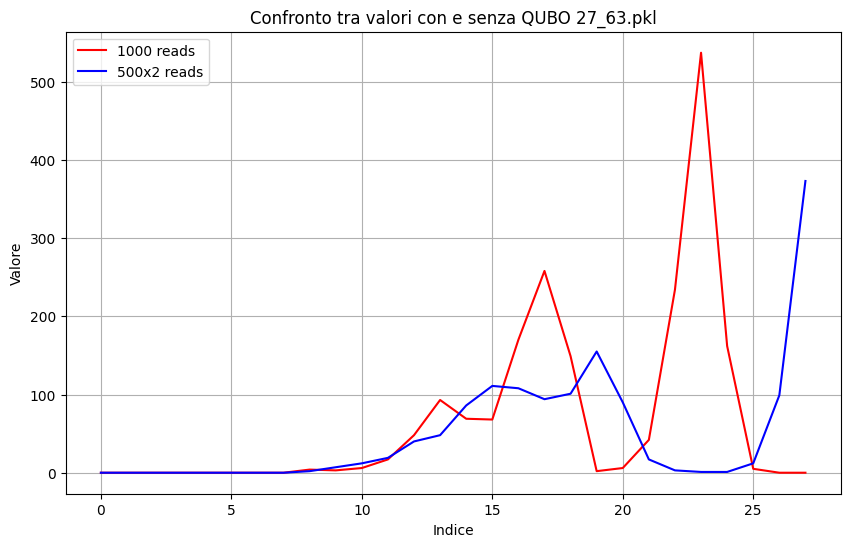

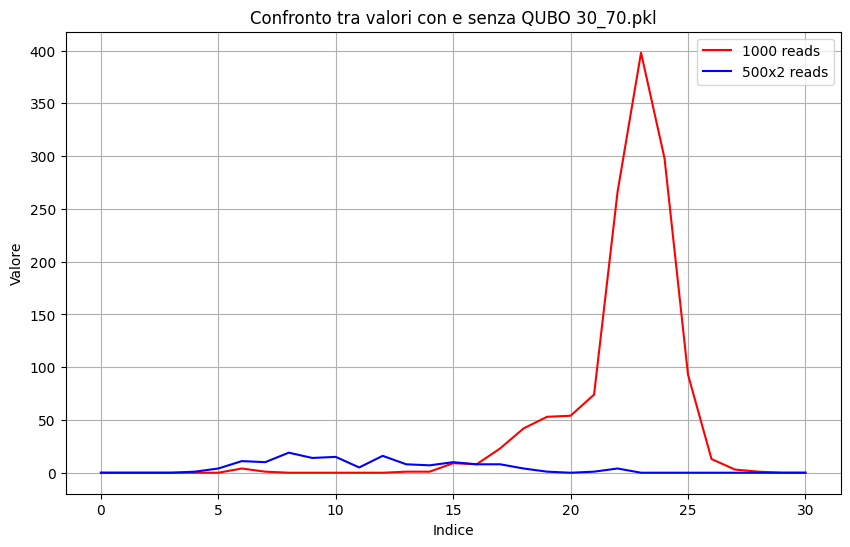

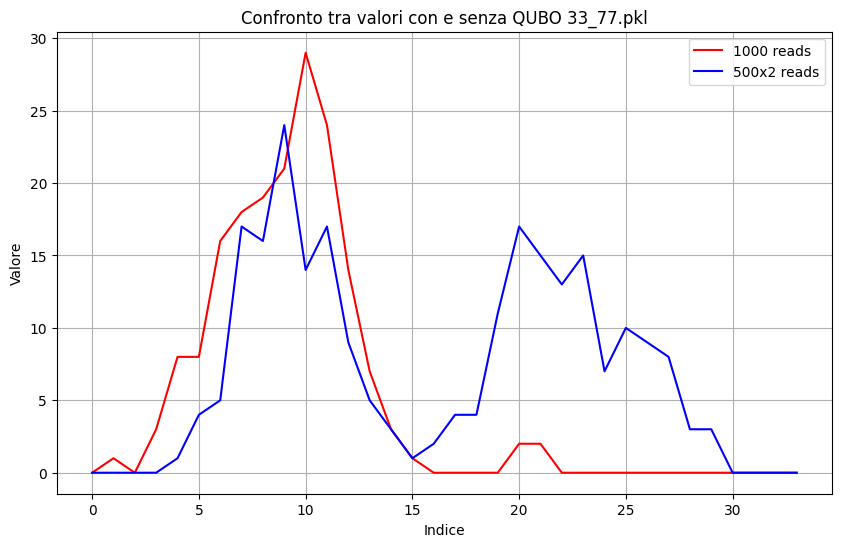

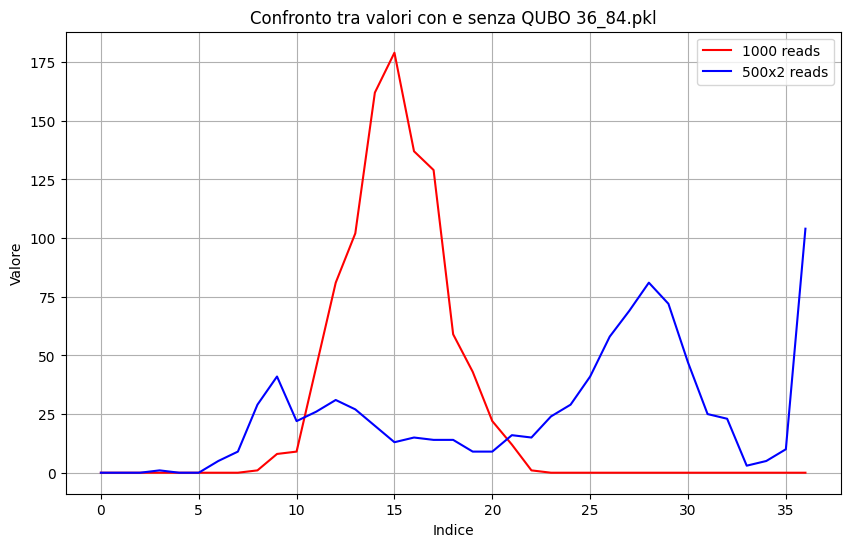

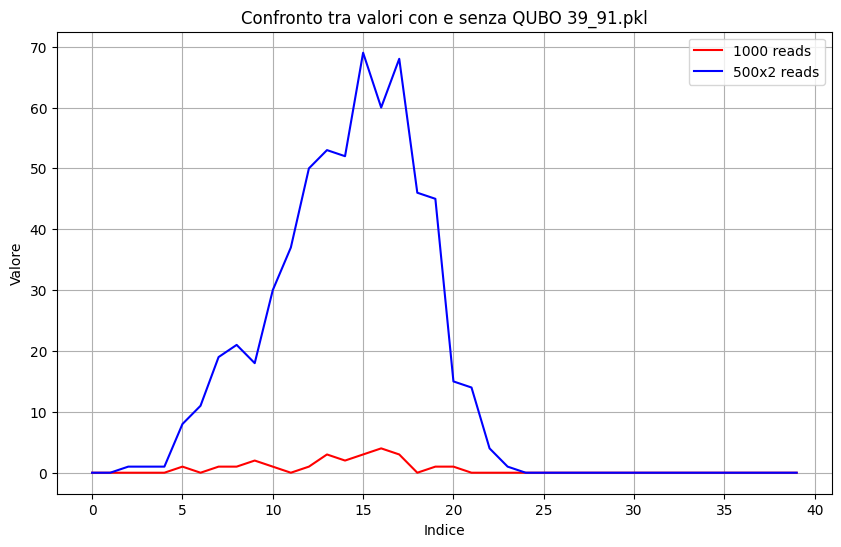

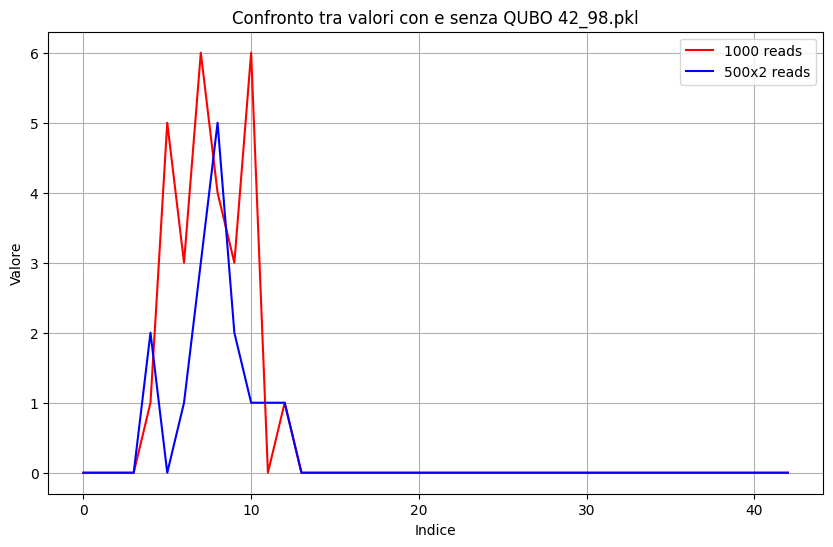

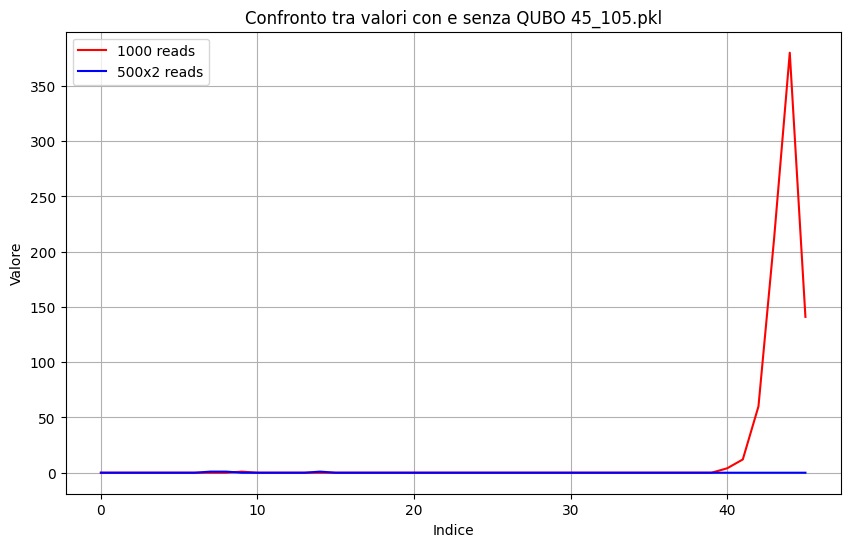

In [10]:
folder = "./output/static_ratio_more_batch/full_dataframes"
for i in sorted(os.listdir(folder), key=extract_numbers):
    df1_f = "./output/static_ratio/full_dataframes/" +i
    df2_f = "./output/static_ratio_more_batch/full_dataframes/" +i
    with open(df1_f, "rb") as f:
        df1 = pickle.load(f)
    with open(df2_f, "rb") as f:
        df2 = pickle.load(f)
    plot_first_row_graph(df1,df2, i, "1000 reads", "500x2 reads")